In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df_votes = pd.read_csv('votes.csv')
df_data = pd.read_csv('data.csv')

#### Looking and getting some infromation from the votes datafram and cleaning it:


In [3]:
df_votes.head() 
# as we can see from votes dataframe, all the values shown in their columns, are absolute and numeric but their datatype is float.

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips
0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,5043
1,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,5087
2,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,13159
3,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,8037
4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,13091


In [4]:
df_votes.shape # votes dataframe has 3141 rows and 7 columns

(3141, 7)

Before checking the data types, we should deal with the NaN values:

In [5]:
nan_rows = df_votes[df_votes['Fips'].isna()]
nan_rows

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips


In [6]:
nan_rows = df_votes[df_votes['Republicans 08 (Votes)'].isna()] # we have dataframe called nan_rows which contains the NaN values from the Republicans 08 column
nan_rows

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips
139,NaN,NaN,NaN,NaN,NaN,NaN,2110
140,NaN,NaN,NaN,NaN,NaN,NaN,2170
397,NaN,NaN,NaN,NaN,NaN,NaN,2068
472,NaN,NaN,NaN,NaN,NaN,NaN,2100
684,NaN,NaN,NaN,NaN,NaN,NaN,2275
889,NaN,NaN,NaN,NaN,NaN,NaN,2185
1284,NaN,NaN,NaN,NaN,NaN,NaN,2050
1285,NaN,NaN,NaN,NaN,NaN,NaN,2270
1286,NaN,NaN,NaN,NaN,NaN,NaN,2188
1376,NaN,NaN,NaN,NaN,NaN,NaN,2090


 So at this point we are replacing every NaN values with the mean of the corresponding column:

In [7]:
mean_votes16_clintonh = df_votes['votes16_clintonh'].mean() # calculate the mean of 'votes16_clintonh' column. There is a way to replace NaN value with the mean of that column

In [8]:
mean_votes16_trumpd = df_votes['votes16_trumpd'].mean()

In [9]:
mean_Republicans_12 = df_votes['Republicans 12 (Votes)'].mean()

In [10]:
mean_Republicans_08 = df_votes['Republicans 08 (Votes)'].mean()

In [11]:
mean_Democrats_12 = df_votes['Democrats 12 (Votes)'].mean()

In [12]:
mean_Democrats_08 = df_votes['Democrats 08 (Votes)'].mean()

In [13]:
df_votes['votes16_trumpd'].replace(np.nan, mean_votes16_trumpd, inplace = True)

In [14]:
df_votes['votes16_clintonh'].replace(np.nan, mean_votes16_clintonh, inplace = True)

In [15]:
df_votes['Republicans 12 (Votes)'].replace(np.nan, mean_Republicans_12, inplace = True)

In [16]:
df_votes['Republicans 08 (Votes)'].replace(np.nan, mean_Republicans_08, inplace = True)

In [17]:
df_votes['Democrats 12 (Votes)'].replace(np.nan, mean_Democrats_12, inplace = True)

In [18]:
df_votes['Democrats 08 (Votes)'].replace(np.nan, mean_Democrats_08, inplace = True)

From dtypes command, we get the data types of all columns, it seems that the data types from all columns except for Fips, need to change because the number of votes are integers not float.

In [19]:
df_votes.dtypes 

Democrats 08 (Votes)      float64
Democrats 12 (Votes)      float64
Republicans 08 (Votes)    float64
Republicans 12 (Votes)    float64
votes16_trumpd            float64
votes16_clintonh          float64
Fips                        int64
dtype: object

Now we get all the columns with int data type:

In [20]:
df_votes['Democrats 08 (Votes)'] = df_votes['Democrats 08 (Votes)'].astype('int64')

In [21]:
df_votes['Democrats 12 (Votes)'] = df_votes['Democrats 12 (Votes)'].astype('int64')

In [22]:
df_votes['Republicans 08 (Votes)'] = df_votes['Republicans 08 (Votes)'].astype('int64')

In [23]:
df_votes['Republicans 12 (Votes)'] = df_votes['Republicans 12 (Votes)'].astype('int64')

In [24]:
df_votes['votes16_clintonh'] = df_votes['votes16_clintonh'].astype('int64')

In [25]:
df_votes['votes16_trumpd'] = df_votes['votes16_trumpd'].astype('int64')            

The command below check the rows and drop it if duplicate

In [26]:
df_votes.drop_duplicates()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips
0,2598,2630,3860,3887,3967,2364,5043
1,2144,2099,3972,4263,4917,1587,5087
2,1935,1845,3916,4136,4353,1544,13159
3,13191,12792,8181,9411,8153,12652,8037
4,2595,2442,5543,5214,5021,1836,13091
5,24162,25136,14008,12777,11295,28467,6025
6,29591,25431,15333,13815,12691,29514,13059
7,1117,987,3286,3490,3755,701,8125
8,1487,1519,3043,3230,3508,1173,8099
9,14334,12688,28661,28280,29983,12422,13045


let's get into some statistics information about votes dataframe using describe command

In [27]:
df_votes.describe() # it seems that everything is good with the statistics information

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips
count,3.141000e+03,3.141000e+03,3141.000000,3141.000000,3141.000000,3.141000e+03,3141.00000
mean,2.230430e+04,2.114972e+04,19207.662846,19532.318052,19634.380134,2.007696e+04,30406.52149
std,7.678193e+04,7.389011e+04,44656.552087,44574.091319,40252.744873,7.166289e+04,15156.09339
min,8.000000e+00,5.000000e+00,67.000000,54.000000,57.000000,4.000000e+00,1001.00000
25%,1.832000e+03,1.572000e+03,2900.000000,2954.000000,3250.000000,1.175000e+03,18181.00000
50%,4.572000e+03,4.044000e+03,6396.000000,6556.000000,7272.000000,3.218000e+03,29179.00000
75%,1.305800e+04,1.195000e+04,16921.000000,17169.000000,18165.000000,1.007900e+04,45083.00000
max,2.295853e+06,2.216903e+06,956425.000000,885333.000000,620285.000000,1.893770e+06,56045.00000


In [28]:
df_votes.duplicated().unique() # there are no any row which is duplicated votes dataset

array([False])

Now we have the votes dataframe without any NaN values and all the data type of the columns are logistic.

#### Looking and getting some infromation from the data datafram and cleaning it:


In [29]:
pd.set_option('display.max_columns', 70) # this command is using to be able to see all the columns. we can use the df_data.columns too to see just the columns.
df_data.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,68.45,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,79.9,0.197,0.108,449.02,NaN,82.0,NaN
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,92.30,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,131.3,0.239,0.053,245.83,NaN,96.8,NaN
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,72.80,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,402.4,0.239,0.096,205.60,NaN,71.6,NaN
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,69.55,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,133.7,0.230,0.081,123.88,NaN,42.9,3.5
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,66.60,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.11,79.4,NaN


In [30]:
df_data.shape # data dataframe has 3141 rows and 54 columns

(3141, 54)

From the statistics infromation about data dataframe, we can get that from the categorical values that Texas from state and Dare County,North California stay at the top regarding to the amount of votes.

In [31]:
df_data.describe(include = 'all') # this command include all columns even the categorical ones like State,..

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
count,3141,3140,3141.00000,3141,3109.000000,3.109000e+03,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03,3133.000000,3141.000000,3141.00000,3140.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,2914.000000,3042.000000,3134.000000,2706.000000,3136.000000,3136.000000,2952.000000,2320.000000,3135.000000,3135.000000,2953.000000,1251.000000,2844.000000,1414.000000
unique,51,51,NaN,3141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Texas,TX,NaN,"San Augustine County, Texas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,254,254,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,30406.52149,NaN,54.940495,4.178247e+04,16.874514,83.045893,19.013419,6.449682,74.953932,25463.387576,78.778908,8.752642,1.819596,1.106129,1.637822,7.904760,24.818609,11.468386,9.711190e+04,43.063837,15.447246,0.43144,21.091720,29.855237,17.443235,22.828797,2.116237,11.521665,16.235721,78.778908,8.752642,7.904760,1.106129,1.819596,1.637822,79.885037,0.717665,39.862846,0.083493,44.406345,0.315941,0.212722,0.305523,0.107103,354.269682,174.590733,0.179860,0.077045,257.055923,6.285803,76.112553,7.737553
std,NaN,NaN,15156.09339,NaN,172.926255,1.134574e+05,7.349563,7.533330,8.646941,3.849162,5.261211,5078.837873,19.625220,14.384847,7.418349,2.435244,1.901044,12.955106,11.889270,5.479738,3.111593e+05,14.526151,6.384713,0.03661,9.569136,6.432767,3.514847,3.484825,2.595179,3.370997,6.114629,19.625220,14.384847,12.955106,2.435244,7.418349,1.901044,19.132100,0.185027,4.922651,0.021065,20.039650,0.103104,0.063096,0.042426,0.022529,273.108568,229.263418,0.054765,0.027680,207.563047,4.659909,24.604878,2.511056
min,NaN,NaN,1001.00000,NaN,1.000000,6.400000e+01,0.700000,29.900000,3.700000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.100000e+01,0.000000,0.000000,0.20700,0.000000,9.050000,0.000000,5.400000,0.000000,0.000000,1.300000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2.650000,0.227734,18.000000,0.030000,4.100000,0.000000,0.031000,0.131000,0.033000,37.400000,11.000000,0.031000,0.008000,0.000000,0.610000,23.300000,2.600000
25%,N

Because the number of columns is high, we're just going to know the sum of the NaN values in each columns.

 The 'sum' command gives us the sum of the total NaN values of each column. As we can see there is a significant NaN values in
 Homicide.rate column and Infant.mortality column that gives the idea to remove these column to get the better data visualising.
 for the rest of the column with the NaN values, maybe it's bettert to replace th NaN value with the mean of the each columns.

In [32]:
df_data.isna().sum() # see the total number of NaN values in each column

State                                                            0
ST                                                               1
Fips                                                             0
County                                                           0
Precincts                                                       32
Votes                                                           32
Less Than High School Diploma                                    0
At Least High School Diploma                                     0
At Least Bachelors's Degree                                      0
Graduate Degree                                                  0
School Enrollment                                                0
Median Earnings 2010                                             0
White (Not Latino) Population                                    0
African American Population                                      0
Native American Population                                    

In [33]:
#df = df_data[df_data['ST'] == 'AK']
#df

from the command below, we get that people from alaska didn't participate in election, so we can remove them from our dataframe, also people from CA voted more than another people so we can conclude that replace th NaN value in the ST with CA

In [34]:
df_data.groupby('ST')['Votes'].sum()

ST
AK           0.0
AL     2078165.0
AR     1091899.0
AZ     2062810.0
CA    11954317.0
CO     2564185.0
CT     1623542.0
DC      280272.0
DE      441535.0
FL     9386750.0
GA     4029564.0
HI      428825.0
IA     1542880.0
ID      688235.0
IL     5374280.0
IN     2722029.0
KS     1147143.0
KY     1923346.0
LA     2027731.0
MA     3231531.0
MD     2474543.0
ME      741550.0
MI     4790917.0
MN     2916404.0
MO     2775098.0
MS     1162987.0
MT      485109.0
NC     4629471.0
ND      336968.0
NE      805638.0
NH      732229.0
NJ     3674893.0
NM      788841.0
NV     1122990.0
NY     7046175.0
OH     5325395.0
OK     1451056.0
OR     1808575.0
PA     5970107.0
RI      450787.0
SC     2084444.0
SD      367151.0
TN     2484691.0
TX     8903237.0
UT      984957.0
VA     3844787.0
VT      291413.0
WA     2957942.0
WI     2937326.0
WV      708226.0
WY      248742.0
Name: Votes, dtype: float64

In [35]:
df_data['ST'].replace(np.nan, 'CA', inplace = True) # replace the NaN values in the ST column with CA which has the highest number in votes

In [36]:
df_data.drop(df_data[df_data['ST'] == 'AK'].index, inplace = True) # remove all the row contain AK as a atate in the ST column

All the code below replace the NaN values with the mean of the corresponding column

In [37]:
df_data['Votes'].replace(np.nan, df_data['Votes'].mean() ,inplace = True)

In [38]:
df_data['Precincts'].replace(np.nan, int(df_data['Precincts'].mean()) ,inplace = True)

In [39]:
df_data['Preschool.Enrollment.Ratio.enrolled.ages.3.and.4'].replace(np.nan, int(df_data['Preschool.Enrollment.Ratio.enrolled.ages.3.and.4'].mean()) ,inplace = True)

In [40]:
df_data['Child.Poverty.living.in.families.below.the.poverty.line'].replace(np.nan, int(df_data['Child.Poverty.living.in.families.below.the.poverty.line'].mean()) ,inplace = True)

In [41]:
df_data['Low.birthweight'].replace(np.nan, int(df_data['Low.birthweight'].mean()) ,inplace = True)

In [42]:
df_data['Teen.births'].replace(np.nan, int(df_data['Teen.births'].mean()) ,inplace = True)

In [43]:
df_data['Children.in.single.parent.households'].replace(np.nan, int(df_data['Children.in.single.parent.households'].mean()) ,inplace = True)

In [44]:
df_data['Adult.smoking'].replace(np.nan, int(df_data['Adult.smoking'].mean()) ,inplace = True)

In [45]:
df_data['Adult.obesity'].replace(np.nan, int(df_data['Adult.obesity'].mean()) ,inplace = True)

In [46]:
df_data['Sexually.transmitted.infections'].replace(np.nan, int(df_data['Sexually.transmitted.infections'].mean()) ,inplace = True)

In [47]:
df_data['HIV.prevalence.rate'].replace(np.nan, int(df_data['HIV.prevalence.rate'].mean()) ,inplace = True)

In [48]:
df_data['Uninsured'].replace(np.nan, int(df_data['Uninsured'].mean()) ,inplace = True)

In [49]:
df_data['Unemployment'].replace(np.nan, int(df_data['Unemployment'].mean()) ,inplace = True)

In [50]:
df_data['Violent.crime'].replace(np.nan, int(df_data['Violent.crime'].mean()) ,inplace = True)

In [51]:
df_data['Injury.deaths'].replace(np.nan, int(df_data['Injury.deaths'].mean()) ,inplace = True)

In [52]:
df_data.drop(columns = ['Infant.mortality', 'Homicide.rate'], inplace = True) # from this part of code we remove two columns which had the most number of NaNs.

At this point we have a dataframe (data) without any NaN values. Most of them are replaced with mean of the each corresponding columns, and we remove two columns which are have a most negative impact on our analysis because of the amount of votes number.

We are going to drop any rows that is duplicated:


In [53]:
df_data.drop_duplicates()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.000000,19.4,80.6,19.4,5.7,78.50,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,68.45,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,79.9,0.197,0.108,449.02,82.0
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.000000,24.2,75.8,13.4,4.1,76.40,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,92.30,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,131.3,0.239,0.053,245.83,96.8
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.000000,21.7,78.3,13.3,5.6,70.20,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,72.80,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,402.4,0.239,0.096,205.60,71.6
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.000000,12.8,87.2,45.9,11.7,64.10,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,69.55,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,133.7,0.230,0.081,123.88,42.9
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.000000,23.1,76.9,13.8,4.8,61.50,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,66.60,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,315.8,0.208,0.115,477.48,79.4
5,California,CA,6025,"Imperial County, California",189.0,41751.000000,37.7,62.3,12.2,4.0,77.95,22388.489205,15.20,3.10,1.00,1.60,0.85,78.25,29.10,14.05,167281,49.7,21.30,0.469,27.75,24.75,21.95,26.90,5.65,8.90,11.80,15.20,3.10,78.25,1.60,1.00,0.85,16.80,0.636799,31.6,0.06,62.2,0.360,0.124,0.235,0.074,429.2,146.1,0.228,0.283,326.13,46.1
6,Georgia,GA,13059,"Clarke County, Georgia",24.0,44221.000000,15.7,84.3,41.2,19.3,83.00,17442.985080,58.90,25.95,0.10,3.70,1.75,9.55,36.00,10.65,114913,51.6,33.25,0.531,33.15,40.10,20.00,22.75,0.60,5.40,11.15,58.90,25.95,9.55,3.70,0.10,1.75,62.60,0.425058,25.8,0.09,24.8,0.429,0.122,0.267,0.090,768.7,288.7,0.243,0.070,369.83,44.8
7,Colorado,CO,8125,"Yuma County, Colorado",15.0,4664.000000,16.4,83.6,17.8,4.5,73.90,23207.848890,78.50,0.15,0.50,0.10,0.50,20.25,9.70,11.35,9836,55.1,10.25,0.414,12.40,30.95,11.45,19.00,9.50,18.20,10.80,78.50,0.15,20.25,0.10,0.50,0.50,78.60,0.657285,36.7,0.07,45.9,0.127,0.177,0.251,0.060,89.1,110.9,0.231,0.040,66.82,66.7
8,Colorado,CO,8099,"Prowers County, Colorado",14.0,4978.000000,19.5,80.5,18.3,7.2,80.45,21133.901270,61.10,0.35,0.35,0.30,1.35,36.45,37.35,14.85,12878,52.4,22.35,0.448,30.90,30.90,16.55,20.25,7.95,12.65,11.70,61.10,0.35,36.45,0.30,0.35,1.

In [54]:
df_data.duplicated().unique() # there are no any row which is duplicated data dataset

array([False])

#### Visualization for votes dataframe of which all the columns are numerical.

In the votes dataframe, all the columns are numerical and for the visualization we can use the histogram to show the distributation of each column.

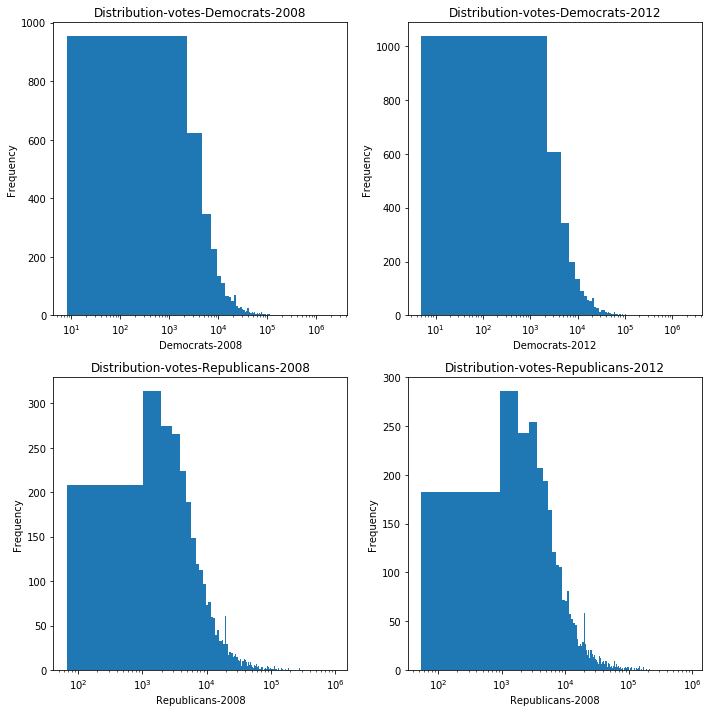

In [55]:
plt.rcParams['figure.figsize'] = (10,10)
plt.subplots(2, 2)
plt.subplot(2, 2, 1)
plt.hist(df_votes['Democrats 08 (Votes)'], bins =1000)
plt.xscale('log') # using this command to get the better visualization
plt.xlabel('Democrats-2008')
plt.ylabel('Frequency')
plt.title('Distribution-votes-Democrats-2008')

plt.subplot(2, 2, 2)
plt.hist(df_votes['Democrats 12 (Votes)'], bins =1000)
plt.xscale('log')
plt.xlabel('Democrats-2012')
plt.ylabel('Frequency')
plt.title('Distribution-votes-Democrats-2012')

plt.subplot(2, 2, 3)
plt.hist(df_votes['Republicans 08 (Votes)'], bins =1000)
plt.xscale('log')
plt.xlabel('Republicans-2008')
plt.ylabel('Frequency')
plt.title('Distribution-votes-Republicans-2008')

plt.subplot(2, 2, 4)
plt.hist(df_votes['Republicans 12 (Votes)'], bins =1000)
plt.xscale('log')
plt.xlabel('Republicans-2008')
plt.ylabel('Frequency')
plt.title('Distribution-votes-Republicans-2012')

plt.tight_layout()
plt.show()

Interestingly, from the histograms above, we can see that both groups in two different years (2008, 2012) had the same behaviour

In the next visualization step, we are going to have a comparison between two president candidates, Hillary Clinton and Donald Trup in 2016:

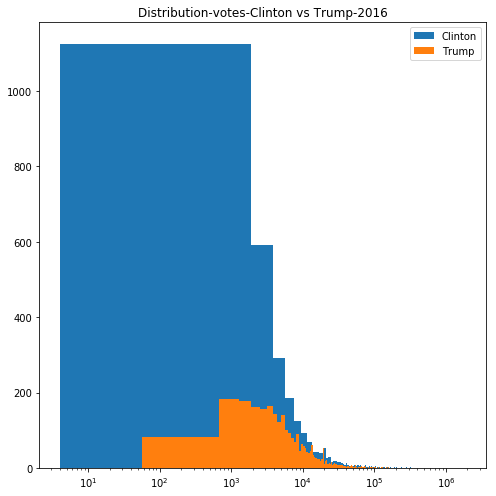

In [56]:
plt.rcParams['figure.figsize'] = (7,7)

x = plt.hist(df_votes['votes16_clintonh'], label = 'Clinton', bins =1000)
y = plt.hist(df_votes['votes16_trumpd'], label = 'Trump', bins =1000)
plt.xscale('log') # using this command to get the better visualization 
plt.title('Distribution-votes-Clinton vs Trump-2016')

plt.legend()
plt.tight_layout()
plt.show()

As we can see from the table above, most of the people voted on Clinton than Trump!

#### Visualization for the data dataframe of which some of them are categorical like county and state, but most of them are numerical:

The plot below, illustrates the number of votes in each States. Because of the type of a column that is categorical, we use a bar chart to show it:


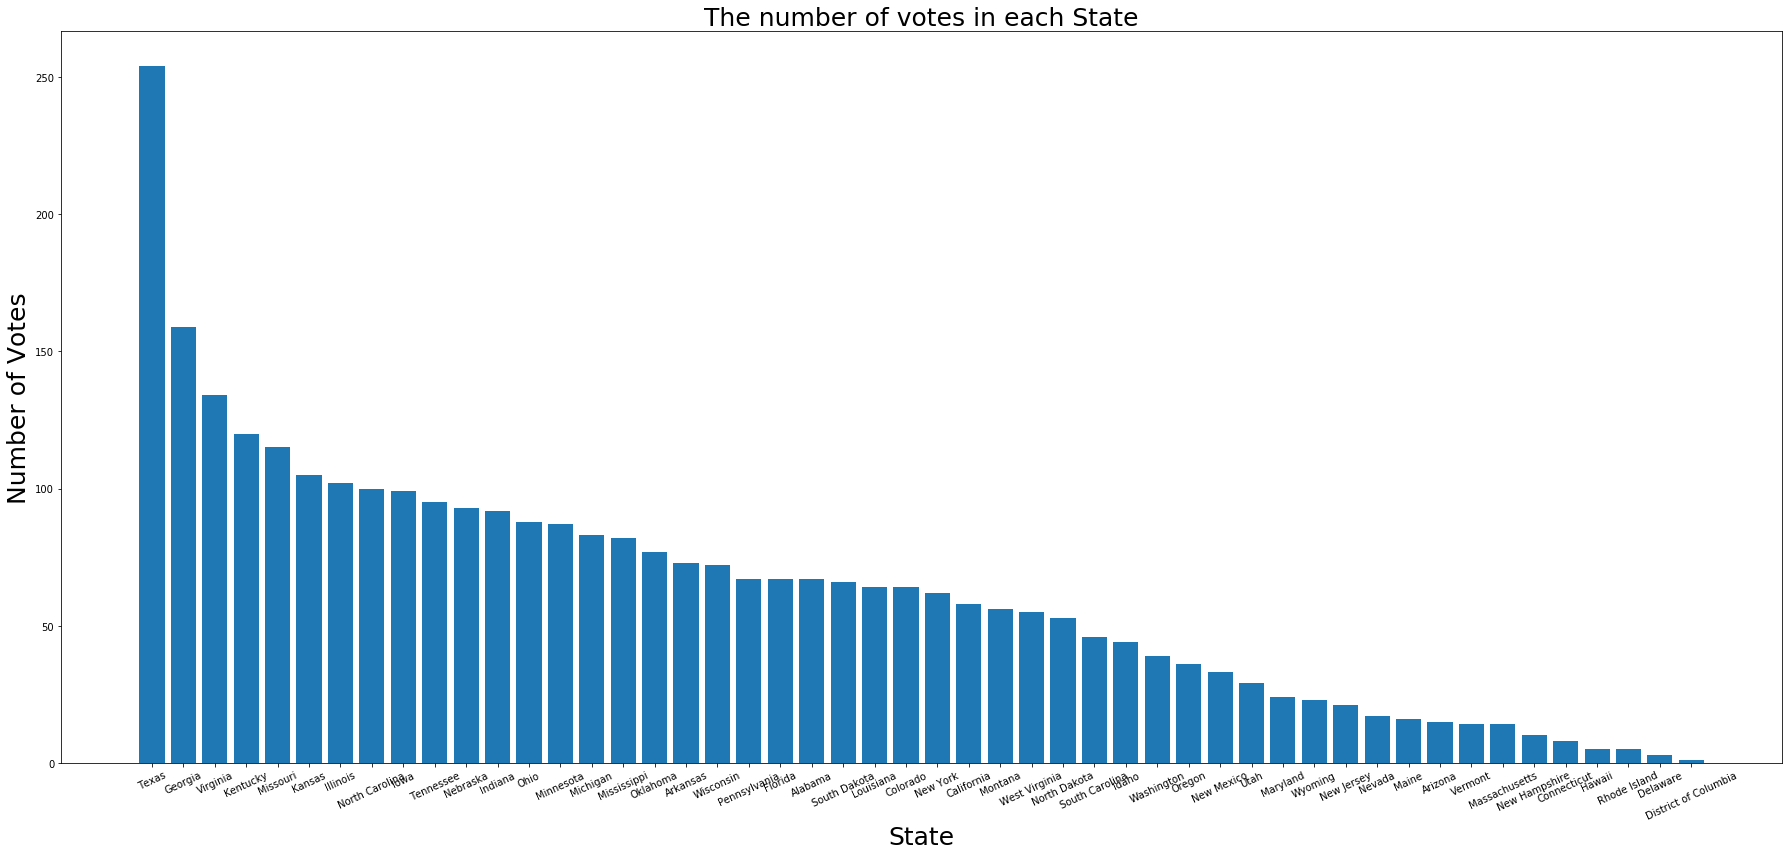

In [57]:
plt.rcParams['figure.figsize'] = (25,12)
plt.bar(df_data['State'].value_counts().index, df_data['State'].value_counts().values)
plt.xlabel('State', size = 25)
plt.ylabel('Number of Votes', size = 25)
plt.title('The number of votes in each State', size = 25)
plt.xticks(rotation=25)


plt.tight_layout()
plt.show()

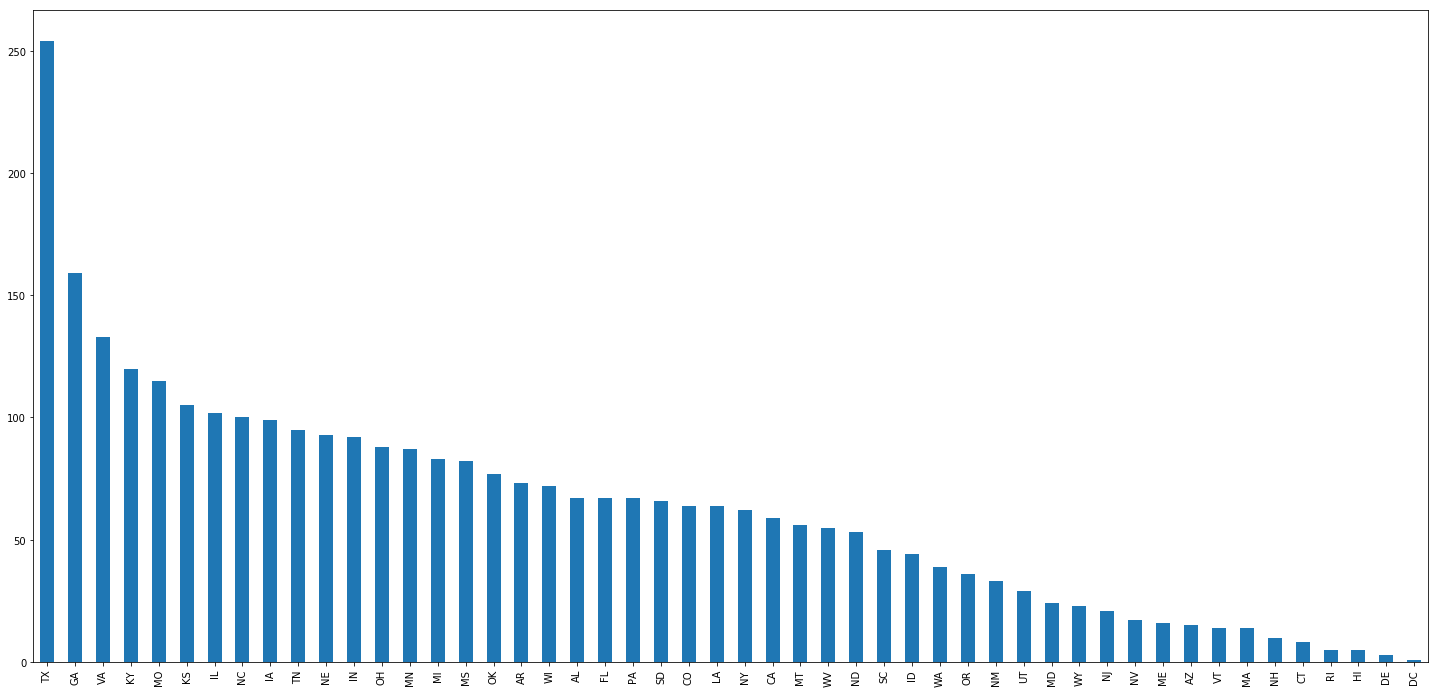

In [58]:
df_data['ST'].value_counts().plot(kind='bar')

The bar chart above shows the number of each ST, the abbreviation of State, using different command.

For some numerical variables in the Data dataframe we choose Votes, Graduate Degree and Fips to show them in histogram plot:

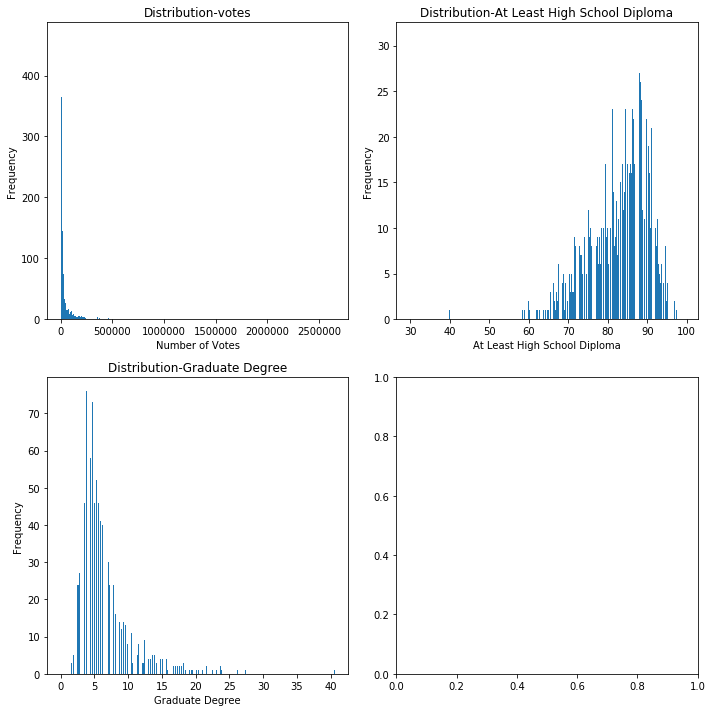

In [59]:
plt.rcParams['figure.figsize'] = (10,10)
plt.subplots(2, 2)
plt.subplot(2, 2, 1)

plt.hist(df_data['Votes'], bins =1000)
#plt.xscale('log') # using this command to get the better visualization
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Distribution-votes')

plt.subplot(2, 2, 2)
plt.hist(df_data['At Least High School Diploma'], bins =1000)
#plt.xscale('log')
plt.xlabel('At Least High School Diploma')
plt.ylabel('Frequency')
plt.title('Distribution-At Least High School Diploma')

plt.subplot(2, 2, 3)
plt.hist(df_data['Graduate Degree'], bins =1000)
#plt.xscale('log')
plt.xlabel('Graduate Degree')
plt.ylabel('Frequency')
plt.title('Distribution-Graduate Degree')

plt.tight_layout()
plt.show()

#### Looking to two dataframe and combining them in the way of having some comparison between different parties and years:

For having a relative county votes for each election, we are going to have different dataframe which contains the relative information for each year. To doing that, create new dataframe that contains the specific columns:

First creating a dataframe contains the data about the year 2008

In [60]:
df_votes_2008 = df_votes[['Republicans 08 (Votes)', 'Democrats 08 (Votes)']].copy()

In [61]:
df_votes_2008.head()

,Republicans 08 (Votes),Democrats 08 (Votes)
0,3860,2598
1,3972,2144
2,3916,1935
3,8181,13191
4,5543,2595


In [62]:
df_county = df_data['County']

In [63]:
df_votes_2008 = pd.concat([df_votes_2008, df_county], axis = 1) # this command concat two different dataframe

In [64]:
df_votes_2008

,Republicans 08 (Votes),Democrats 08 (Votes),County
0,3860,2598,"Drew County, Arkansas"
1,3972,2144,"Madison County, Arkansas"
2,3916,1935,"Jasper County, Georgia"
3,8181,13191,"Eagle County, Colorado"
4,5543,2595,"Dodge County, Georgia"
5,14008,24162,"Imperial County, California"
6,15333,29591,"Clarke County, Georgia"
7,3286,1117,"Yuma County, Colorado"
8,3043,1487,"Prowers County, Colorado"
9,28661,14334,"Carroll County, Georgia"


In [65]:
total_votes_2008 = df_votes_2008.groupby('County')['Republicans 08 (Votes)', 'Democrats 08 (Votes)'].sum()
total_votes_2008.head()

,Republicans 08 (Votes),Democrats 08 (Votes)
County,,
"Abbeville County, South Carolina",6264,4593
"Acadia Parish, Louisiana",19229,7028
"Accomack County, Virginia",7833,7607
"Ada County, Idaho",93328,82236
"Adair County, Iowa",2060,1924


Creating a dataframe contains the data about the year 2012:

In [66]:
df_votes_2012 = df_votes[['Republicans 12 (Votes)', 'Democrats 12 (Votes)']].copy()

In [67]:
df_votes_2012.head()

,Republicans 12 (Votes),Democrats 12 (Votes)
0,3887,2630
1,4263,2099
2,4136,1845
3,9411,12792
4,5214,2442


In [68]:
df_votes_2012 = pd.concat([df_votes_2012, df_county], axis = 1) # this command concat two different dataframe
df_votes_2012.head()

,Republicans 12 (Votes),Democrats 12 (Votes),County
0,3887,2630,"Drew County, Arkansas"
1,4263,2099,"Madison County, Arkansas"
2,4136,1845,"Jasper County, Georgia"
3,9411,12792,"Eagle County, Colorado"
4,5214,2442,"Dodge County, Georgia"


In [69]:
total_votes_2012 = df_votes_2012.groupby('County')['Republicans 12 (Votes)', 'Democrats 12 (Votes)'].sum()
total_votes_2012.head()

,Republicans 12 (Votes),Democrats 12 (Votes)
County,,
"Abbeville County, South Carolina",5981,4543
"Acadia Parish, Louisiana",19931,6560
"Accomack County, Virginia",8213,7655
"Ada County, Idaho",97554,77137
"Adair County, Iowa",2114,1790


The table above shows the total number of votes in each county through the each party.

Finally, we create a table contains the total number of votes in each county that given to two differen candidates, Donald Trump and Hilary Clinton in 2016:

In [70]:
df_votes_2016 = df_votes[['votes16_clintonh', 'votes16_trumpd']].copy()

In [71]:
df_votes_2016 = pd.concat([df_votes_2016, df_county], axis = 1) # this command concat two different dataframe

In [72]:
total_votes_2016 = df_votes_2016.groupby('County')['votes16_clintonh', 'votes16_trumpd'].sum()
total_votes_2016.head()

,votes16_clintonh,votes16_trumpd
County,,
"Abbeville County, South Carolina",3712,6742
"Acadia Parish, Louisiana",5638,21159
"Accomack County, Virginia",6737,8582
"Ada County, Idaho",75676,93748
"Adair County, Iowa",1127,2456


#### Now we are going to calculate the relative votes in each county.

##### 1)
Comparison between two different parties in the amount of votes and the relative votes in each county (2008):

In [73]:
df_total_2008 = pd.DataFrame(total_votes_2008['Republicans 08 (Votes)'] \
                             + total_votes_2008['Democrats 08 (Votes)'])
# create a dataframe contains the sum of the votes

In [74]:
total_votes_2008 = pd.concat([total_votes_2008, df_total_2008], axis = 1)

In [78]:
total_votes_2008.head()

,Republicans 08 (Votes),Democrats 08 (Votes),0
County,,,
"Abbeville County, South Carolina",57.695496,42.304504,10857
"Acadia Parish, Louisiana",73.233804,26.766196,26257
"Accomack County, Virginia",50.731865,49.268135,15440
"Ada County, Idaho",53.158962,46.841038,175564
"Adair County, Iowa",51.706827,48.293173,3984


In [76]:
total_votes_2008['Republicans 08 (Votes)'] = (total_votes_2008['Republicans 08 (Votes)'] * 100) \
                                        / total_votes_2008[0]
# calculate the relative votes for Republicans in each county

In [77]:
total_votes_2008['Democrats 08 (Votes)'] = (total_votes_2008['Democrats 08 (Votes)'] * 100) \
                                        / total_votes_2008[0]
# calculate the relative votes for Democrats in each county

##### 2)
Comparison between two different parties in the amount of votes and the relative votes in each county (2012):

In [79]:
df_total_2012 = pd.DataFrame(total_votes_2012['Republicans 12 (Votes)'] \
                             + total_votes_2012['Democrats 12 (Votes)'])
# create a dataframe contains the sum of the votes

In [80]:
total_votes_2012 = pd.concat([total_votes_2012, df_total_2012], axis = 1)

In [84]:
total_votes_2012.head()

,Republicans 12 (Votes),Democrats 12 (Votes),0
County,,,
"Abbeville County, South Carolina",56.832003,43.167997,10524
"Acadia Parish, Louisiana",75.236873,24.763127,26491
"Accomack County, Virginia",51.758256,48.241744,15868
"Ada County, Idaho",55.843747,44.156253,174691
"Adair County, Iowa",54.149590,45.850410,3904


In [82]:
total_votes_2012['Republicans 12 (Votes)'] = (total_votes_2012['Republicans 12 (Votes)'] * 100) \
                                        / total_votes_2012[0]
# calculate the relative votes for Republicans in each county

In [83]:
total_votes_2012['Democrats 12 (Votes)'] = (total_votes_2012['Democrats 12 (Votes)'] * 100) \
                                        / total_votes_2012[0]
# calculate the relative votes for Democrats in each county

##### 3)
Comparison between the Donald Trump and Hilary Clinton in the amount of votes and the relative votes in each county:

In this part we need the sum of the votes from Clinton and Trump in 2016.

In [85]:
df_total_2016 = pd.DataFrame(total_votes_2016['votes16_clintonh'] \
                             + total_votes_2016['votes16_trumpd']) 
# create a dataframe contains the sum of the votes

In [90]:
total_votes_2016.head() 
# now we have a new column called '0' contains the total votes. (I didn't know how to change the name of the column)

,votes16_clintonh,votes16_trumpd,0
County,,,
"Abbeville County, South Carolina",35.507940,64.492060,10454
"Acadia Parish, Louisiana",21.039669,78.960331,26797
"Accomack County, Virginia",43.978066,56.021934,15319
"Ada County, Idaho",44.666635,55.333365,169424
"Adair County, Iowa",31.454089,68.545911,3583


In [87]:
total_votes_2016 = pd.concat([total_votes_2016, df_total_2016], axis = 1)

In [88]:
total_votes_2016['votes16_clintonh'] = (total_votes_2016['votes16_clintonh'] * 100) \
                                        / total_votes_2016[0]
# calculate the relative votes for Clinton each county

In [89]:
total_votes_2016['votes16_trumpd'] = (total_votes_2016['votes16_trumpd'] * 100) \
                                        / total_votes_2016[0]
# calculate the relative votes for Trump each county